# Checking requisites

In [2]:
! pip install pandas numpy seaborn matplotlib scikit-learn imblearn xgboost


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import datetime
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV





In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Uploading data

In [5]:
client = pd.read_csv('./data/base_clientes.csv')
churn = pd.read_csv('./data/base_hist_churn.csv')
price = pd.read_csv('./data/base_precos.csv')

# Exploratory Data Analysis and Cleaning

## Initial descriptive analysis

In [6]:
client.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,NaN,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,NaN,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,NaN,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321


In [7]:
client.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,2.012000e+04,2.012000e+04,2.012000e+04,4385.000000,4385.000000,4385.000000,4385.000000,20120.000000,20120.000000,...,19970.000000,19970.000000,19970.000000,20120.000000,20105.000000,20105.000000,20120.00000,20102.000000,20120.000000,20116.000000
mean,NaN,1.949648e+05,3.196017e+04,1.953380e+04,344.466267,344.466267,3907.823737,214.150812,2370.826669,1912.253529,...,0.135960,0.052889,43.543557,196.822941,22.475752,21.353071,1.34826,217.304279,5.023658,20.578284
std,NaN,6.754792e+05,1.782284e+05,8.087283e+04,724.065119,724.065119,5700.747714,542.506310,4047.481373,5231.517730,...,0.026286,0.048587,5.173667,498.026444,23.853275,28.838847,1.45777,356.223220,1.678148,21.833836
min,NaN,-1.252760e+05,-4.275000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,-2.090000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-528.640000,-981.560000,1.00000,-4148.990000,1.000000,0.000000
25%,NaN,5.832750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1162.140000,0.000000,509.840000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.970000,11.950000,1.00000,51.542500,4.000000,12.500000
50%,NaN,1.533450e+04,0.000000e+00,9.060000e+02,162.600000,162.600000,2220.850000,40.830000,1176.745000,378.500000,...,0.142881,0.086163,44.311378,44.820000,21.090000,21.000000,1.00000,119.425000,5.000000,13.856000
75%,NaN,5.035500e+04,0.000000e+00,4.119500e+03,398.500000,398.500000,4273.450000,228.660000,2700.552500,2019.000000,...,0.146348,0.098837,44.311378,220.850000,29.640000,29.500000,1.00000,276.965000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,19021.240000,19021.240000,81122.630000,18267.500000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,18267.500000,500.320000,500.320000,32.00000,24570.650000,16.000000,500.000000


In [8]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20120 non-null  object 
 1   activity_new              8221 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             14846 non-null  object 
 4   cons_12m                  20120 non-null  int64  
 5   cons_gas_12m              20120 non-null  int64  
 6   cons_last_month           20120 non-null  int64  
 7   date_activ                20120 non-null  object 
 8   date_end                  20118 non-null  object 
 9   date_first_activ          4385 non-null   object 
 10  date_modif_prod           19918 non-null  object 
 11  date_renewal              20076 non-null  object 
 12  forecast_base_bill_ele    4385 non-null   float64
 13  forecast_base_bill_year   4385 non-null   float64
 14  foreca

In [9]:
price.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000
mean,0.141013,0.054352,0.030709,43.333166,10.699025,6.458055
std,0.025113,0.050004,0.036324,5.403902,12.853889,7.783320
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085474,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101674,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [ ]:
price[price < 0] = None

In [10]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241238 entries, 0 to 241237
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            241238 non-null  object 
 1   price_date    241238 non-null  object 
 2   price_p1_var  239577 non-null  float64
 3   price_p2_var  239577 non-null  float64
 4   price_p3_var  239577 non-null  float64
 5   price_p1_fix  239577 non-null  float64
 6   price_p2_fix  239577 non-null  float64
 7   price_p3_fix  239577 non-null  float64
dtypes: float64(6), object(2)
memory usage: 14.7+ MB


In [11]:
churn.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [13]:

client.shape

(20120, 32)

In [14]:
client.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

<Axes: xlabel='Features', ylabel='Missing values (%)'>

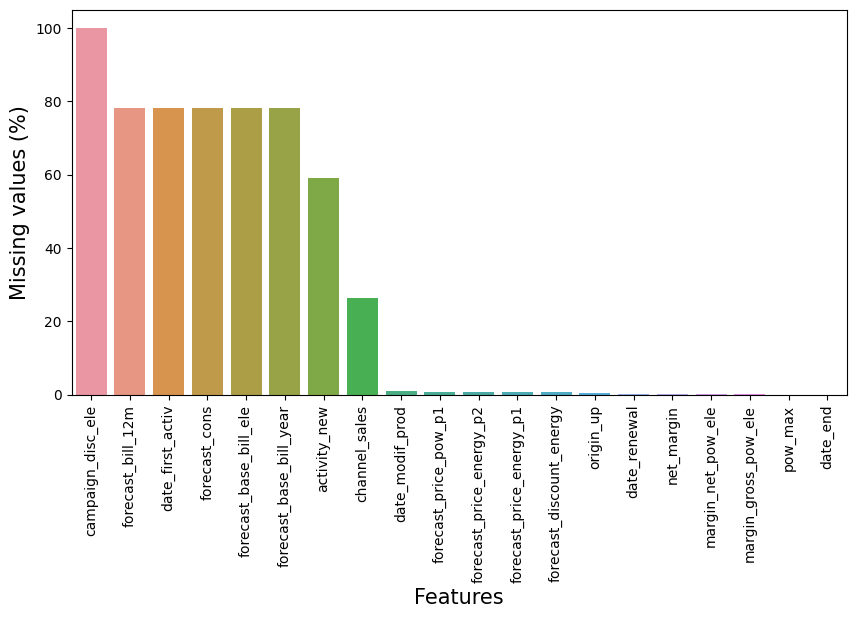

In [15]:
nan_count = ((client.isnull().sum()/client.shape[0])*100).sort_values(ascending=False)
nan_count = nan_count[nan_count>0]
plt.figure(figsize=(10,5))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing values (%)', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=nan_count.index, y=nan_count.values)

Campaign_disc_ele is 100% empty!

Removing it and the others 5 features with high null percentage...

In [16]:
client.drop(nan_count.index[:6],axis=1,inplace=True)
client.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,27/08/2021,07/09/2021,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,13/12/2016,01/01/2022,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,27/08/2021,05/09/2021,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,03/01/2017,03/01/2023,03/01/2017,04/01/2022,...,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,07/10/2017,07/10/2022,27/08/2021,09/10/2021,...,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


In [17]:
client['activity_new'] = client['activity_new'].fillna('new activity')
client['channel_sales'] = client['channel_sales'].fillna('new channel')

In [18]:
client[nan_count.index[7:]].nunique()

channel_sales                   8
date_modif_prod              2423
forecast_price_pow_p1          48
forecast_price_energy_p2      439
forecast_price_energy_p1      658
forecast_discount_energy       14
origin_up                       6
date_renewal                  420
net_margin                  15761
margin_net_pow_ele           3338
margin_gross_pow_ele         3304
pow_max                       985
date_end                      372
dtype: int64

In [19]:
client[nan_count.index[7:]].isnull().sum()

channel_sales                 0
date_modif_prod             202
forecast_price_pow_p1       150
forecast_price_energy_p2    150
forecast_price_energy_p1    150
forecast_discount_energy    150
origin_up                   114
date_renewal                 44
net_margin                   18
margin_net_pow_ele           15
margin_gross_pow_ele         15
pow_max                       4
date_end                      2
dtype: int64

Filling missing dates with the next row.

In [20]:
client[['date_modif_prod','date_renewal','date_end']] = client[['date_modif_prod','date_renewal', 'date_end']].fillna(method='bfill')

Replacing missing values with most frequent.

In [21]:
origin_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
client[['origin_up']] = origin_imp.fit_transform(client[['origin_up']])

In [22]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
client[[x for x in nan_count.index[7:] if x not in ['date_modif_prod', 'date_renewal','origin_up','date_end']]] = imp_freq.fit_transform(
    client[[x for x in nan_count.index[7:] if x not in ['date_modif_prod', 'date_renewal','origin_up','date_end']]])

In [23]:
df = pd.merge(client, churn, on=['id'])


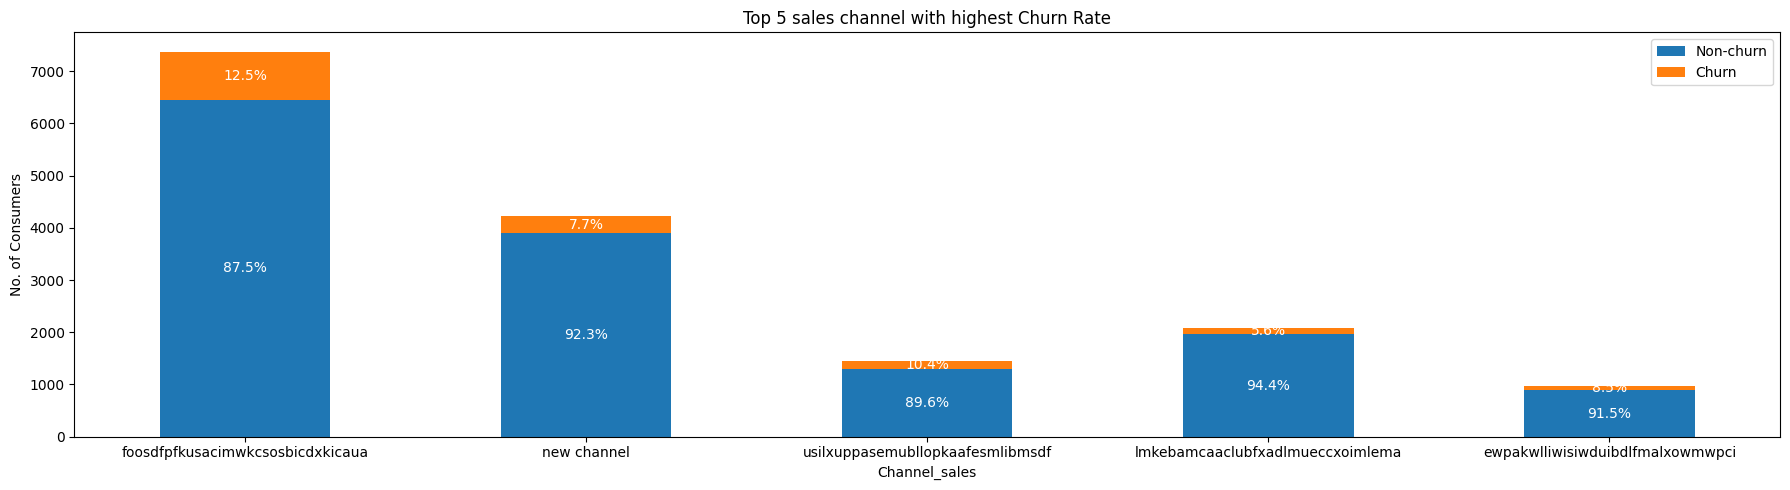

In [24]:
sales = df[["channel_sales", "churn", "id"]].groupby([
    "channel_sales", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
sales_percentage = (sales.div(sales.sum(axis=1), axis=0) * 100)

# Plotting
ax = sales.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Top 5 sales channel with highest Churn Rate")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in sales.index}

# Add percentage annotations to each bar
for channel in sales.index:
    for col in sales.columns:
        value = sales.loc[channel, col]
        percentage = sales_percentage.loc[channel, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[channel] + value/2
        ax.text(sales.index.get_loc(channel), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[channel] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Channel_sales")
plt.tight_layout()
plt.show()

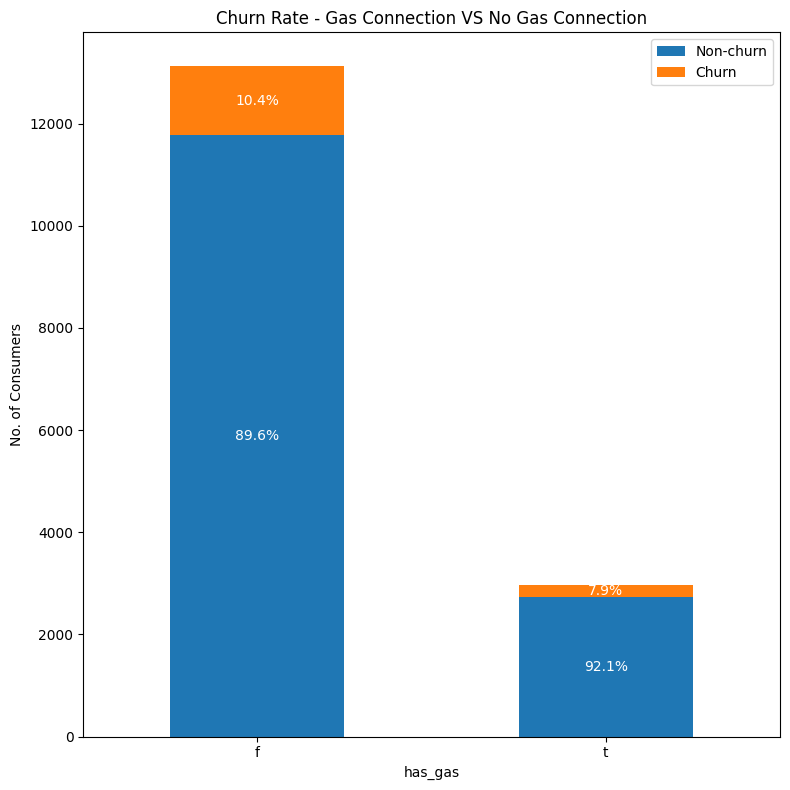

In [25]:
cons_12m = df[["has_gas", "churn", "id"]].groupby([
    "has_gas", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(8, 8), stacked=True, rot=0, title="Churn Rate - Gas Connection VS No Gas Connection")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for gas_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[gas_status, col]
        percentage = cons_12m_percentage.loc[gas_status, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[gas_status] + value/2
        ax.text(cons_12m.index.get_loc(gas_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[gas_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("has_gas")
plt.tight_layout()
plt.show()


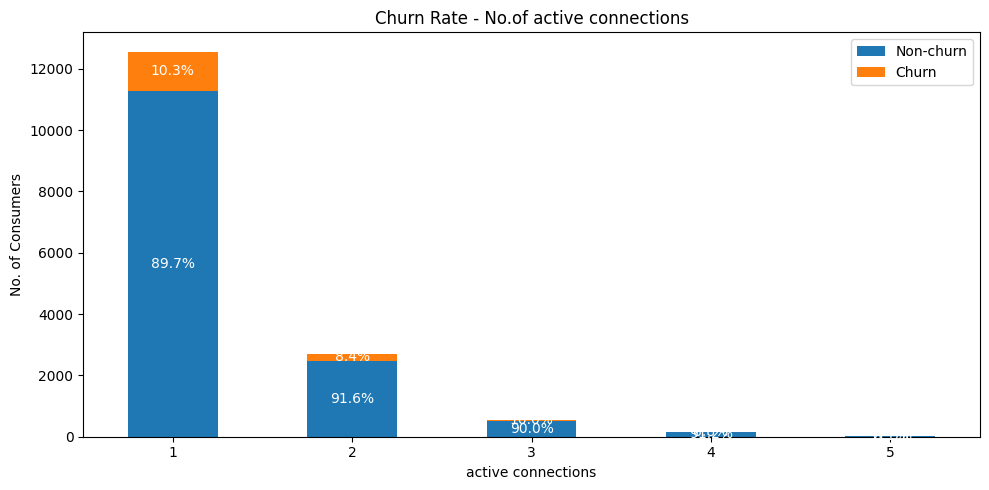

In [26]:
cons_12m = df[["nb_prod_act", "churn", "id"]].groupby([
    "nb_prod_act", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(10, 5), stacked=True, rot=0, title="Churn Rate - No.of active connections")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for conn_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[conn_status, col]
        percentage = cons_12m_percentage.loc[conn_status, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[conn_status] + value/2
        ax.text(cons_12m.index.get_loc(conn_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[conn_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("active connections")
plt.tight_layout()
plt.show()

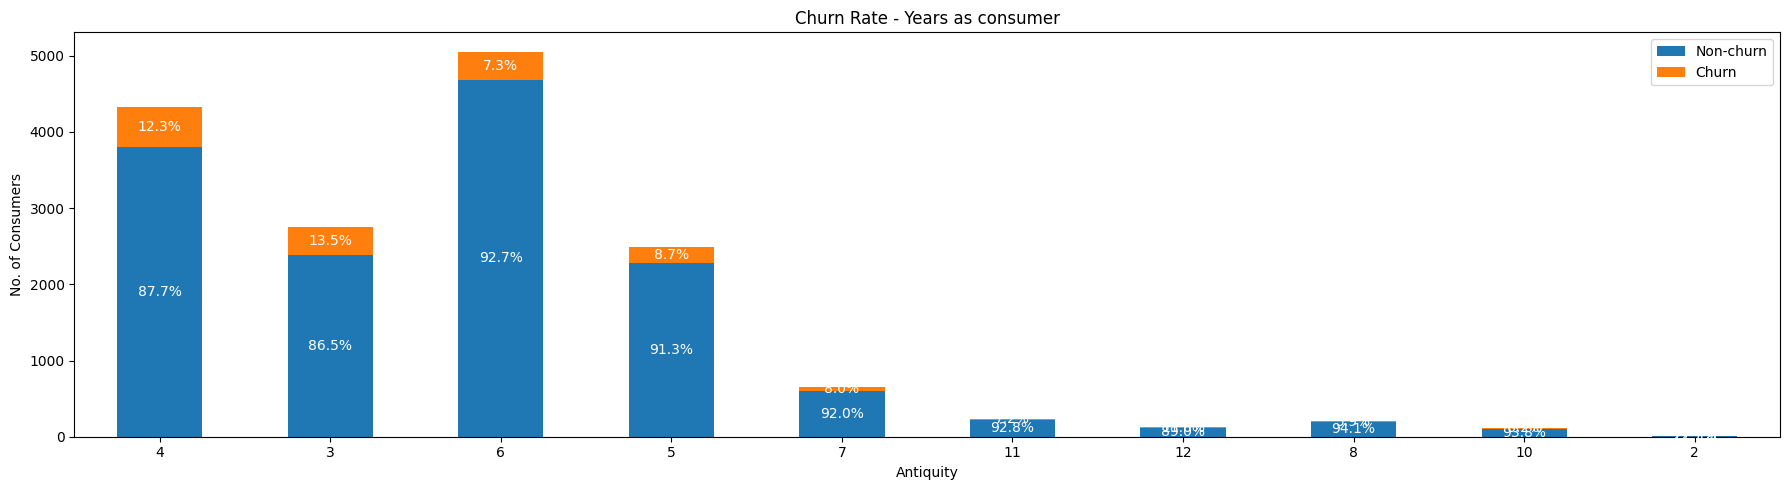

In [27]:
cons_12m = df[["num_years_antig", "churn", "id"]].groupby([
    "num_years_antig", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:10]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Churn Rate - Years as consumer")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for year in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[year, col]
        percentage = cons_12m_percentage.loc[year, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[year] + value/2
        ax.text(cons_12m.index.get_loc(year), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[year] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Antiquity")
plt.tight_layout()
plt.show()

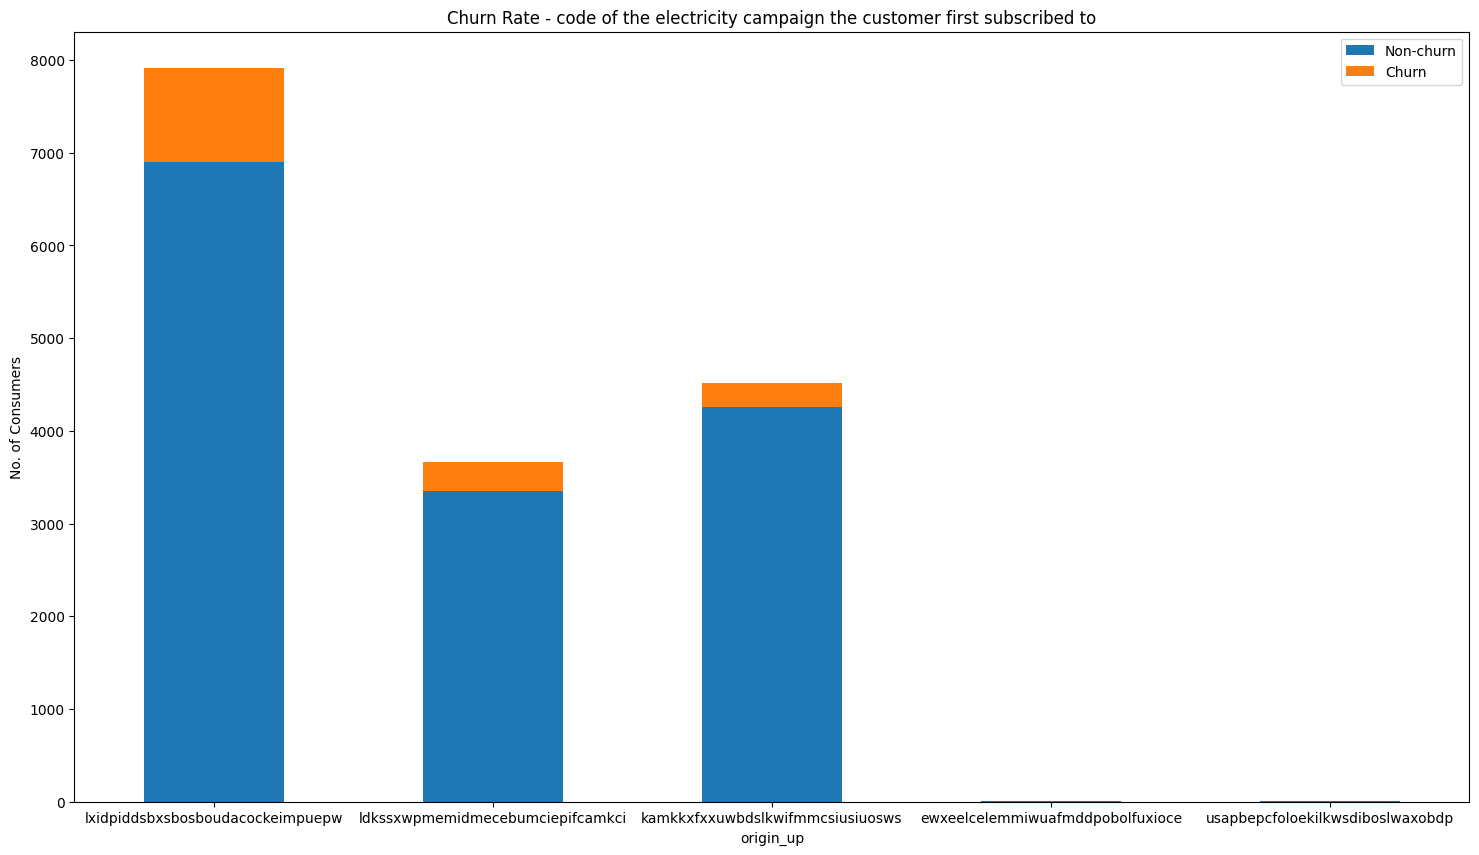

In [28]:
cons_12m = df[["origin_up",
               "churn", "id"]].groupby([
    "origin_up","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - code of the electricity campaign the customer first subscribed to")
# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("origin_up")
plt.show()

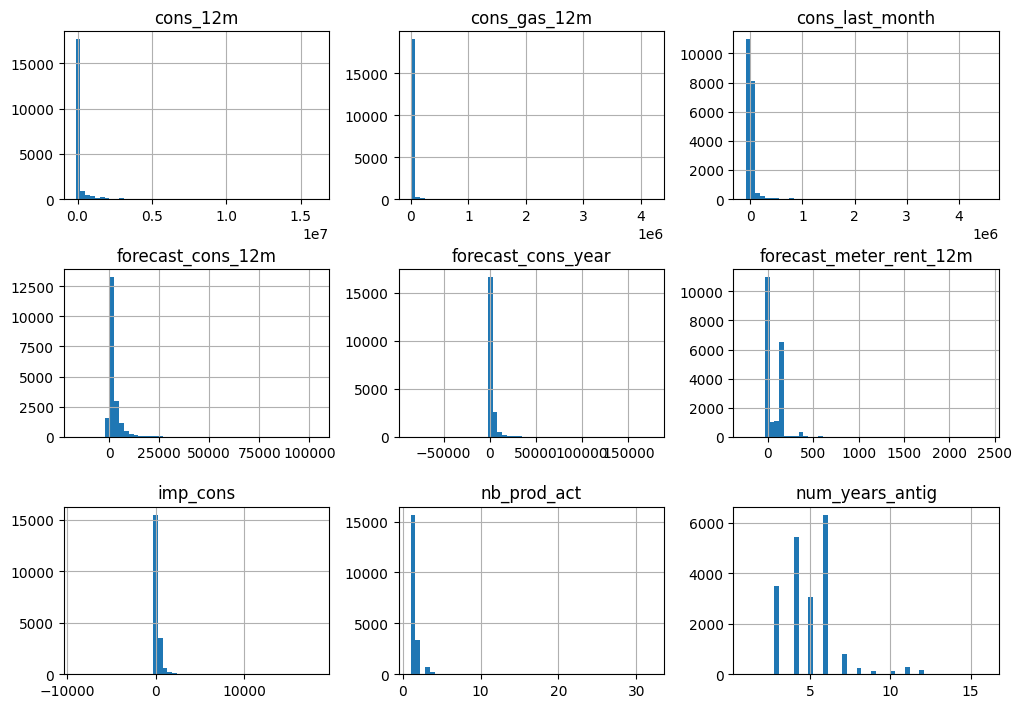

In [29]:
client.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

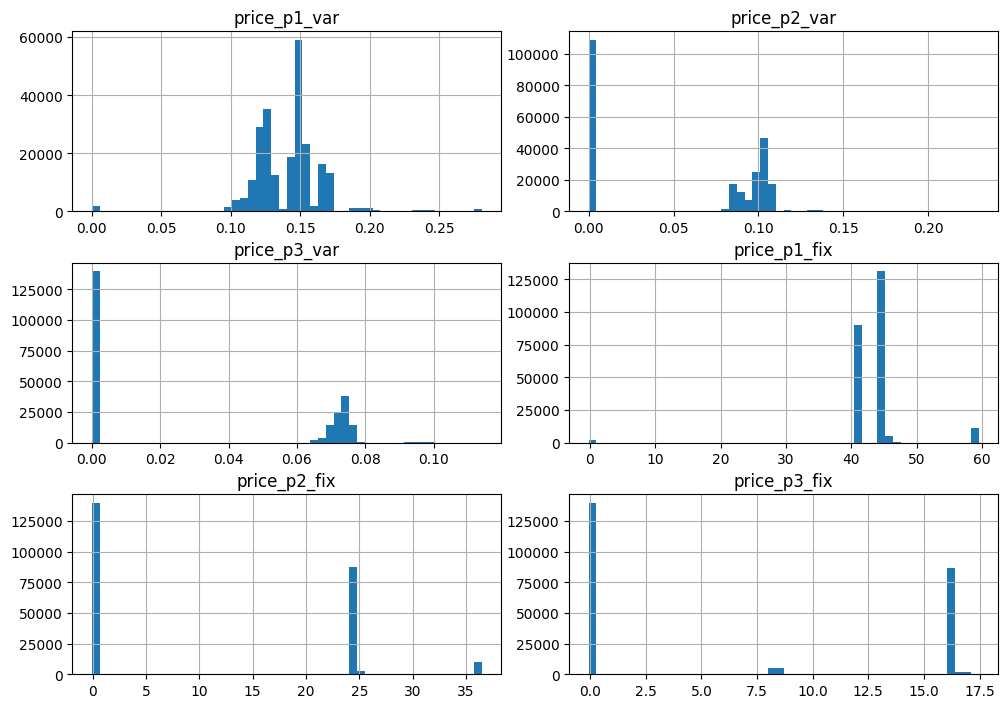

In [30]:
price.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

In [31]:
# List of date columns
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

# For each column, remove problematic dates
for col in date_columns:
    mask = pd.to_datetime(df[col], dayfirst=True, errors='coerce').isna()
    problematic_dates = df[col][mask]

    # If there are problematic dates, print them and remove associated rows
    if len(problematic_dates) > 0:
        print(f"Problematic dates in {col}:")
        print(problematic_dates)
        df.drop(index=problematic_dates.index, inplace=True)

# Convert each column to DateTime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst=True)

Problematic dates in date_activ:
1264     29/02/2018
1577     29/02/2018
4218     29/02/2018
6302     29/02/2018
7246     29/02/2018
8648     29/02/2018
13622    29/02/2018
15115    29/02/2018
Name: date_activ, dtype: object
Problematic dates in date_end:
47       29/02/2022
572      29/02/2022
1644     29/02/2022
1888     29/02/2022
2163     29/02/2022
            ...    
15304    29/02/2022
15557    29/02/2022
15574    29/02/2022
15654    29/02/2022
15788    29/02/2022
Name: date_end, Length: 65, dtype: object


## Identification of numerical and categorical columns

In [32]:
numerica_cols = ["cons_12m", "cons_gas_12m", "cons_last_month", "date_activ", "date_end", "date_first_activ", "date_modif_prod", "date_renewal", "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m", "forecast_cons", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", "forecast_meter_rent_12m", "forecast_price_energy_p1", "forecast_price_energy_p2", "forecast_price_pow_p1", "imp_cons", "margin_gross_pow_ele", "margin_net_pow_ele", "nb_prod_act", "net_margin", "num_years_antig", "pow_max"]
categorica_cols = ["id", "activity_new", "campaign_disc_ele", "channel_sales", "has_gas", "origin_up", "churn"]

print('Colunas numéricas:', numerica_cols)
print('Colunas categóricas:', categorica_cols)

Colunas numéricas: ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']
Colunas categóricas: ['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'has_gas', 'origin_up', 'churn']


# Descriptive analysis after data processing

In [33]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,imp_cons,nb_prod_act,num_years_antig,churn
count,1.602300e+04,1.602300e+04,1.602300e+04,16023,16023,16023,16023,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000
mean,1.945781e+05,3.200227e+04,1.943322e+04,2017-01-17 00:27:35.420333312,2022-07-28 06:27:20.591649536,2018-12-14 07:59:54.607751424,2021-07-21 13:32:09.750982912,2369.506865,1906.893840,70.322933,196.024253,1.348312,5.029895,0.099170
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,2006-07-25 00:00:00,2012-08-26 00:00:00,2006-07-25 00:00:00,2019-06-26 00:00:00,-16689.260000,-85627.000000,-242.960000,-9038.210000,1.000000,1.000000,0.000000
25%,5.895500e+03,0.000000e+00,0.000000e+00,2016-01-12 00:00:00,2022-04-30 00:00:00,2016-08-08 00:00:00,2021-04-21 00:00:00,512.500000,0.000000,16.230000,0.000000,1.000000,4.000000,0.000000
50%,1.530300e+04,0.000000e+00,8.980000e+02,2017-03-04 00:00:00,2022-07-31 00:00:00,2019-04-29 00:00:00,2021-07-27 00:00:00,1178.310000,377.000000,19.440000,44.320000,1.000000,5.000000,0.000000
75%,5.006350e+04,0.000000e+00,4.115500e+03,2018-04-27 00:00:00,2022-11-01 00:00:00,2021-05-24 00:00:00,2021-10-30 00:00:00,2689.435000,1992.500000,131.485000,217.610000,1.000000,6.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,2020-09-01 00:00:00,2023-06-13 00:00:00,2022-01-29 00:00:00,2022-01-28 00:00:00,103801.930000,175375.000000,2411.690000,15042.790000,32.000000,16.000000,1.000000
std,6.801762e+05,1.779524e+05,8.245585e+04,NaN,NaN,NaN,NaN,4039.712325,5264.374084,79.038711,494.967193,1.462746,1.675651,0.298899


# Graphs to visualize the relationship between the chosen variables

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


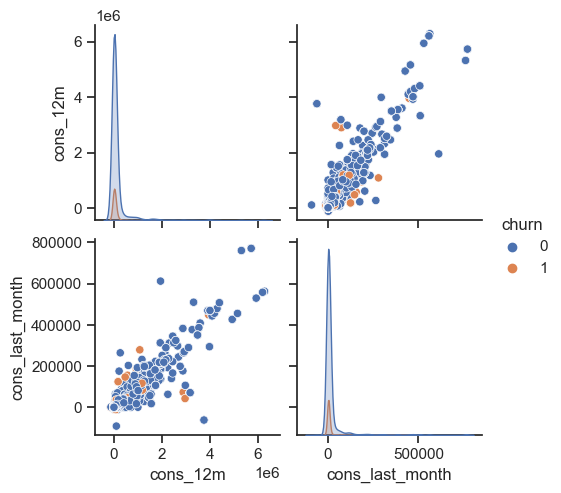

In [34]:
test_regressão = df[['cons_12m', 'cons_last_month','churn']]
teste = test_regressão['cons_12m'].idxmax()
df_without_high_cons = test_regressão.drop(teste)

sns.set(style="ticks")
sns.pairplot(df_without_high_cons, hue="churn")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


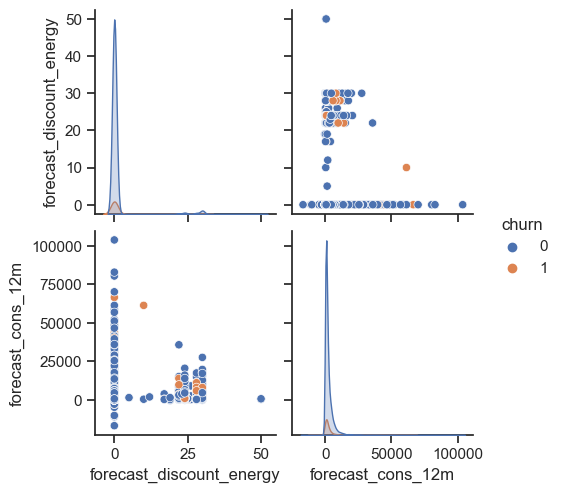

In [35]:
test_regressão = df[['forecast_discount_energy', 'forecast_cons_12m','churn']]

sns.set(style="ticks")
sns.pairplot(test_regressão, hue="churn")
plt.show()

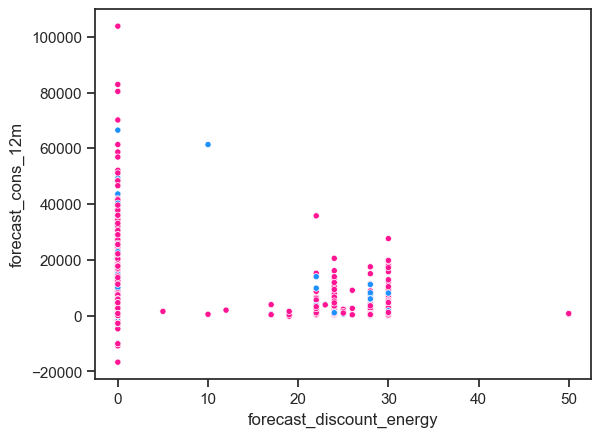

In [36]:
# Creating the scatter plot
colors = df['churn'].map({1: 'dodgerblue', 0: 'deeppink'})
ax = df.plot.scatter(x='forecast_discount_energy', y='forecast_cons_12m', c = colors, edgecolors='w', linewidth=0.5)

# Showing the chart
plt.show()

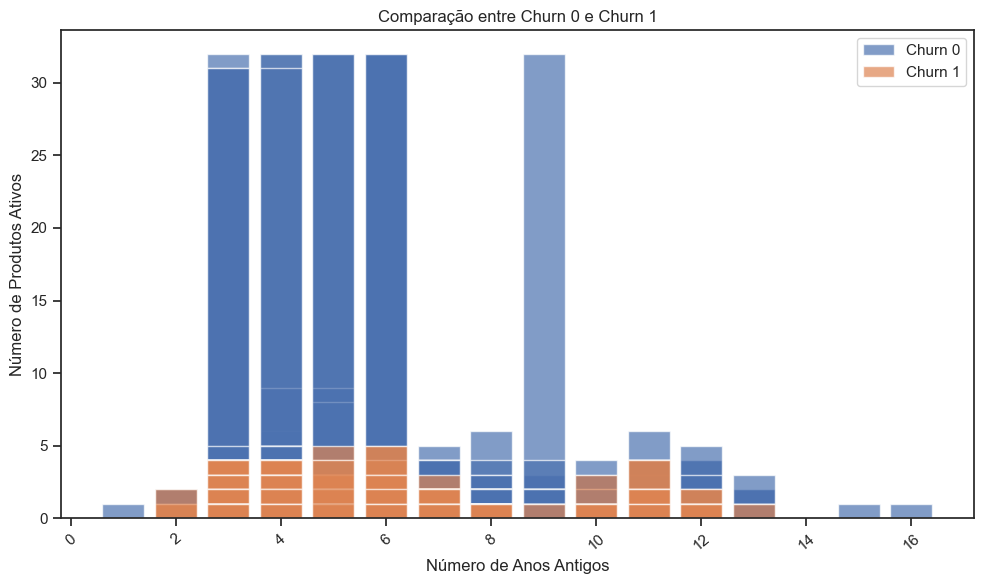

In [37]:
churn0= df[df['churn'] == 0]
churn1= df[df['churn'] == 1]
plt.figure(figsize=(10, 6))
plt.bar(churn0['num_years_antig'], churn0['nb_prod_act'], label='Churn 0', alpha=0.7)
plt.bar(churn1['num_years_antig'], churn1['nb_prod_act'], label='Churn 1', alpha=0.7)
plt.xlabel('Número de Anos Antigos')
plt.ylabel('Número de Produtos Ativos')
plt.title('Comparação entre Churn 0 e Churn 1')
plt.xticks(rotation=40)
plt.legend()

plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x1b2ec747e90>,
 [Text(-1.0470449880908288, 0.33718955042212767, '0'),
  Text(1.0470449565208602, -0.3371896484535525, '1')],
 [Text(-0.5711154480495428, 0.18392157295752415, '90.1%'),
  Text(0.5711154308295601, -0.18392162642921042, '9.9%')])

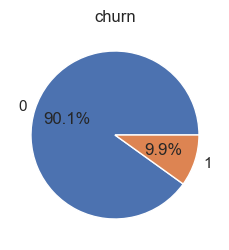

In [38]:
sizes = df['churn'].value_counts(sort = True)
labels = np.unique(df.churn)
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Feature Engineering

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16023 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16023 non-null  object        
 1   activity_new              16023 non-null  object        
 2   channel_sales             16023 non-null  object        
 3   cons_12m                  16023 non-null  int64         
 4   cons_gas_12m              16023 non-null  int64         
 5   cons_last_month           16023 non-null  int64         
 6   date_activ                16023 non-null  datetime64[ns]
 7   date_end                  16023 non-null  datetime64[ns]
 8   date_modif_prod           16023 non-null  datetime64[ns]
 9   date_renewal              16023 non-null  datetime64[ns]
 10  forecast_cons_12m         16023 non-null  float64       
 11  forecast_cons_year        16023 non-null  int64         
 12  forecast_discount_energ

In [40]:
df = df[~df.applymap(lambda x: isinstance(x, (int, float)) and x < 0).any(axis=1)]


In [41]:
df.loc[:, 'contract_tenure'] = (df['date_end'] - df['date_activ']).apply(lambda x: x.days)

C:\Users\leogk\AppData\Local\Temp\ipykernel_16352\1361488024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'contract_tenure'] = (df['date_end'] - df['date_activ']).apply(lambda x: x.days)


In [42]:
df['renovation_tenure'] = (df['date_renewal'] - df['date_modif_prod']).apply(lambda x: x.days)

C:\Users\leogk\AppData\Local\Temp\ipykernel_16352\2618130037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation_tenure'] = (df['date_renewal'] - df['date_modif_prod']).apply(lambda x: x.days)


In [43]:
df['contract_tenure_year'] = df['contract_tenure'].apply(lambda x: int(np.round(x / 365)))

C:\Users\leogk\AppData\Local\Temp\ipykernel_16352\1645455172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contract_tenure_year'] = df['contract_tenure'].apply(lambda x: int(np.round(x / 365)))


Separate columns into quarters

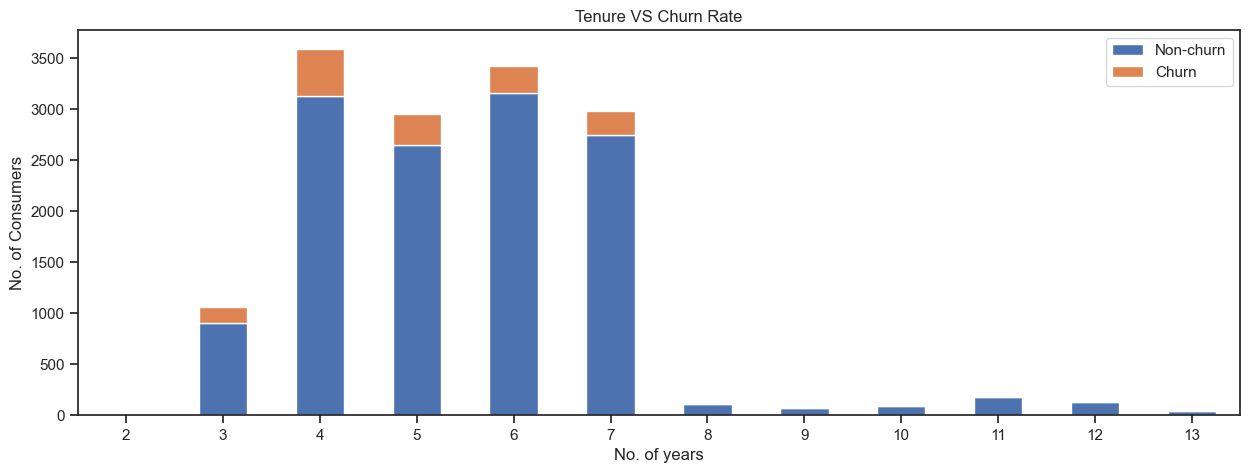

In [44]:
tenure = df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure.plot(kind="bar",
 figsize=(15,5),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate"),

# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

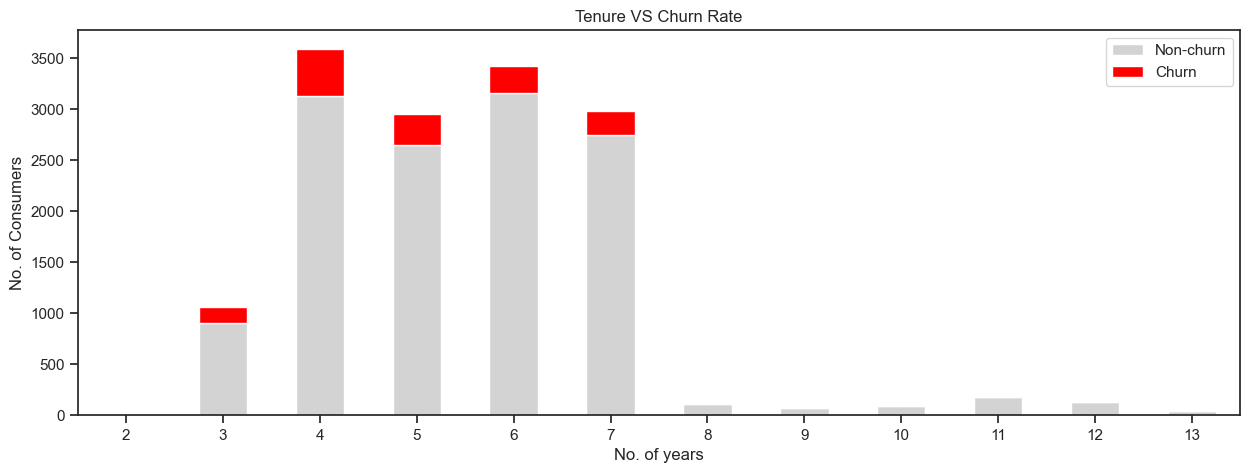

In [45]:
tenure = df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
custom_colors = ["lightgray", "red"]
tenure.plot(kind="bar",
 figsize=(15,5),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate",
 color=custom_colors)

# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

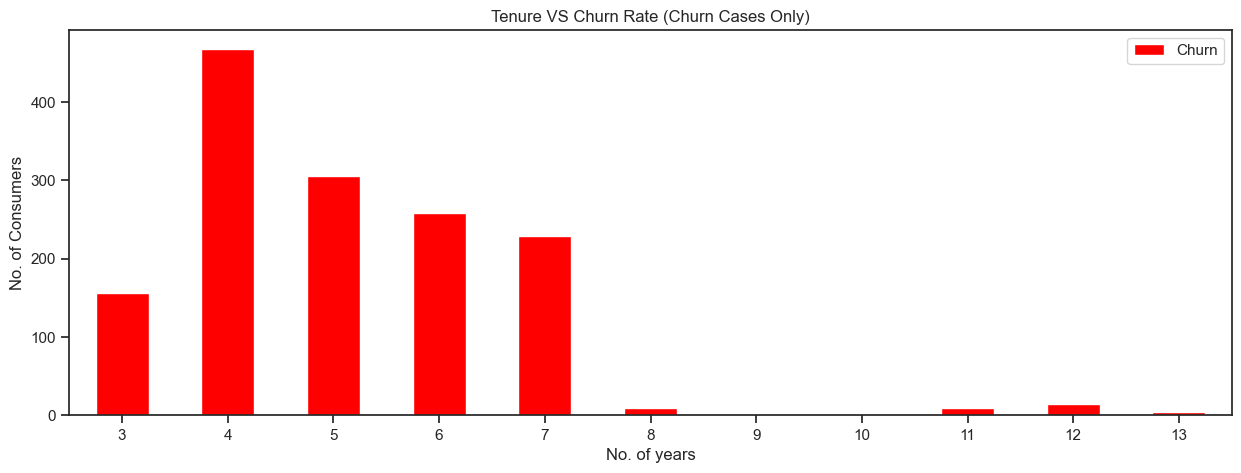

In [46]:
churn_data = df[df["churn"] == 1]
tenure = churn_data[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0) * 100)
tenure.plot(kind="bar",
            figsize=(15, 5),
            stacked=True,
            rot=0,
            title="Tenure VS Churn Rate (Churn Cases Only)",
            color="red")
plt.legend(["Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()


It appears that medium-term contracts have the most churn by far...

Calculating the deviation between last month bill and last 12 months average:

In [47]:
df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']

C:\Users\leogk\AppData\Local\Temp\ipykernel_16352\817011021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']


Calculate the ratio of last 12month consumption to next 12 month forecasted consumption:

In [48]:
def handleInf(x):
    if x==float('-inf') or x==float('inf'):
        return 0

In [49]:
df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
df.cons_pattern = df.cons_pattern.apply(handleInf)

C:\Users\leogk\AppData\Local\Temp\ipykernel_16352\1339534947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
C:\Users\leogk\AppData\Local\Temp\ipykernel_16352\1339534947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cons_pattern = df.cons_pattern.apply(handleInf)


In [50]:
price.shape

(241238, 8)

In [51]:
price.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,3acc714fbd9b3ccaac3c412cf220e929,01/01/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,01/02/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,01/03/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0


In [52]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
price[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']] = imp_freq.fit_transform(
    price[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']])

In [53]:
colunas_para_converter = ['price_p1_fix', 'price_p1_var', 'price_p2_fix', 'price_p2_var', 'price_p3_fix', 'price_p3_var']
price[colunas_para_converter] = price[colunas_para_converter].astype(float)

In [54]:
def calculate_consumption(fix_price, var_price):
    if var_price != 0:
        return fix_price / var_price
    else:
        return 0

price["consumption_p1"] = price.apply(lambda row: calculate_consumption(row["price_p1_fix"], row["price_p1_var"]), axis=1)
price["consumption_p2"] = price.apply(lambda row: calculate_consumption(row["price_p2_fix"], row["price_p2_var"]), axis=1)
price["consumption_p3"] = price.apply(lambda row: calculate_consumption(row["price_p3_fix"], row["price_p3_var"]), axis=1)
#d_price = d_price.drop(['price_p1_fix', 'price_p1_var', 'price_p2_fix', 'price_p2_var', 'price_p3_fix', 'price_p3_var'], axis=1)

In [55]:
price.isnull().sum()

id                0
price_date        0
price_p1_var      0
price_p2_var      0
price_p3_var      0
price_p1_fix      0
price_p2_fix      0
price_p3_fix      0
consumption_p1    0
consumption_p2    0
consumption_p3    0
dtype: int64

In [56]:
price.groupby('id')[['consumption_p1', 'consumption_p2', 'consumption_p3']].mean()

,consumption_p1,consumption_p2,consumption_p3
id,,,
0002203ffbb812588b632b9e628cc38d,327.659237,235.363953,222.602013
000381698491fec6983d55828fe5ada6,580.977007,402.293909,126.270167
0004351ebdd665e6ee664792efc4fd13,303.191801,0.000000,0.000000
000861c9aa2a0784b8d83f8b5b95d010,326.869860,234.344025,216.873292
0010bcc39e42b3c2131ed2ce55246e3c,254.036436,0.000000,0.000000
...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,304.289727,220.146801,208.531834
fffac626da707b1b5ab11e8431a4d0a2,301.218347,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,267.579560,192.318306,177.097052


In [57]:
price.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3
0,3acc714fbd9b3ccaac3c412cf220e929,01/01/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,01/02/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,01/03/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0


In [58]:
count_distribution = price.groupby('id').size().value_counts().sort_index()
print(count_distribution)

7         5
8         5
9         9
10       14
11      102
12    19985
Name: count, dtype: int64


In [59]:
""" client_churn_info = df[['id','churn']]
price_df = client_churn_info.merge(price,on='id') """

" client_churn_info = df[['id','churn']]\nprice_df = client_churn_info.merge(price,on='id') "

In [60]:
""" price_df['price_date'].dtypes """

" price_df['price_date'].dtypes "

In [61]:
""" #Spliting the dataset into churn and non-churn price by price date
churn_price = price_df[price_df['churn']==1].groupby(['price_date']).mean()
non_churn_price = price_df[price_df['churn']==0].groupby('price_date').mean() """

" #Spliting the dataset into churn and non-churn price by price date\nchurn_price = price_df[price_df['churn']==1].groupby(['price_date']).mean()\nnon_churn_price = price_df[price_df['churn']==0].groupby('price_date').mean() "

In [62]:
""" #Plotting average price of energy by month 
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.subplot(131)
non_churn_grp_price.price_off_peak_var.plot()
churn_grp_price.price_off_peak_var.plot()
plt.xticks(rotation=45)
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at off peak')
plt.subplot(132)
non_churn_grp_price.price_peak_var.plot()
churn_grp_price.price_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at peak')
plt.xticks(rotation=45)
plt.subplot(133)
non_churn_grp_price.price_mid_peak_var.plot()
churn_grp_price.price_mid_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at mid peak')
plt.xticks(rotation=45)
plt.suptitle('Energy price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show() """

" #Plotting average price of energy by month \nplt.figure(figsize=(15,3))\nplt.xticks(rotation=45)\nplt.subplot(131)\nnon_churn_grp_price.price_off_peak_var.plot()\nchurn_grp_price.price_off_peak_var.plot()\nplt.xticks(rotation=45)\nplt.legend(['Not Churn','Churn'])\nplt.title('Energy price at off peak')\nplt.subplot(132)\nnon_churn_grp_price.price_peak_var.plot()\nchurn_grp_price.price_peak_var.plot()\nplt.legend(['Not Churn','Churn'])\nplt.title('Energy price at peak')\nplt.xticks(rotation=45)\nplt.subplot(133)\nnon_churn_grp_price.price_mid_peak_var.plot()\nchurn_grp_price.price_mid_peak_var.plot()\nplt.legend(['Not Churn','Churn'])\nplt.title('Energy price at mid peak')\nplt.xticks(rotation=45)\nplt.suptitle('Energy price of Non-Churn vs Churn Customers')\nplt.subplots_adjust(top=0.8)\nplt.show() "

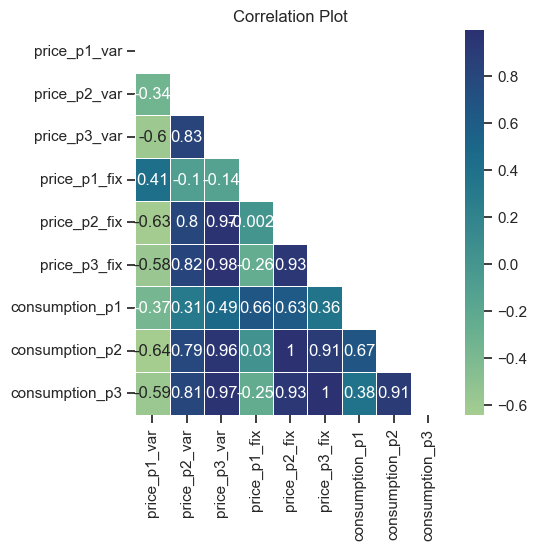

In [63]:
plt.figure(figsize=(5,5))
price_corr = price.iloc[:, 2:].corr()
mask = np.triu(np.ones_like(price_corr))
sns.heatmap(price_corr,annot=True,cmap="crest",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

In [64]:
def drop_highly_correlated_cols(df, threshold=0.95):
    """
    Drop columns that have a correlation above a given threshold, considering only numeric columns.

    Parameters:
    - df: DataFrame
    - threshold: Correlation threshold

    Returns:
    - DataFrame with columns removed
    """
    # Select only numeric columns for correlation computation
    numeric_cols = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = numeric_cols.corr().abs()

    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(
        pd.DataFrame(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    )

    # Find columns to drop
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop the columns and return the modified DataFrame
    return df.drop(columns=to_drop)

price = drop_highly_correlated_cols(price, threshold=0.9)
price.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3
0,3acc714fbd9b3ccaac3c412cf220e929,01/01/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,01/02/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,01/03/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0


In [65]:
#Filtering out the January and December energy off peak (p1_var) price
price_off_peak_energy = price[['id','price_p1_var']]
first_prices = price_off_peak_energy.groupby('id').price_p1_var.first().reset_index().rename(columns={'price_p1_var':'price_off_peak_var_jan'})
last_prices = price_off_peak_energy.groupby('id').last().price_p1_var.reset_index().rename(columns={'price_p1_var':'price_off_peak_var_dec'})

In [66]:
price['price_date'] = pd.to_datetime(price['price_date'])

In [67]:
price.drop('price_p1_var',axis=1,inplace=True)

In [68]:
#Taking average of Power off-peak and mid-peak
price = price.groupby('id').mean().reset_index()

In [69]:
#Calculating Energy off peak difference
price = price.merge(first_prices,on='id').merge(last_prices,on='id')
price['energy_off_peak_variation'] = price.price_off_peak_var_jan - price.price_off_peak_var_dec
price.drop(['price_off_peak_var_jan','price_off_peak_var_dec'],axis=1,inplace=True)

In [70]:
price.head()

,id,price_date,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,energy_off_peak_variation
0,0002203ffbb812588b632b9e628cc38d,2021-01-06 12:00:00,0.103794,0.073160,40.701732,24.421038,16.280694,327.659237,235.363953,222.602013,0.006192
1,000381698491fec6983d55828fe5ada6,2021-01-06 12:00:00,0.090583,0.066138,59.055122,36.417707,8.350996,580.977007,402.293909,126.270167,0.008272
2,0004351ebdd665e6ee664792efc4fd13,2021-01-06 12:00:00,0.000000,0.000000,44.385450,0.000000,0.000000,303.191801,0.000000,0.000000,0.004104
3,000861c9aa2a0784b8d83f8b5b95d010,2021-01-06 12:00:00,0.104134,0.075021,40.661003,24.396601,16.264402,326.869860,234.344025,216.873292,0.007794
4,0010bcc39e42b3c2131ed2ce55246e3c,2021-01-06 12:00:00,0.000000,0.000000,45.319710,0.000000,0.000000,254.036436,0.000000,0.000000,-0.050443


In [71]:
price.shape

(20120, 11)

In [72]:
price.drop('price_date',axis=1,inplace=True)

In [73]:
df.shape

(14662, 32)

In [74]:
df = pd.merge(price, df, on=['id'])

In [75]:
df.shape

(14662, 41)

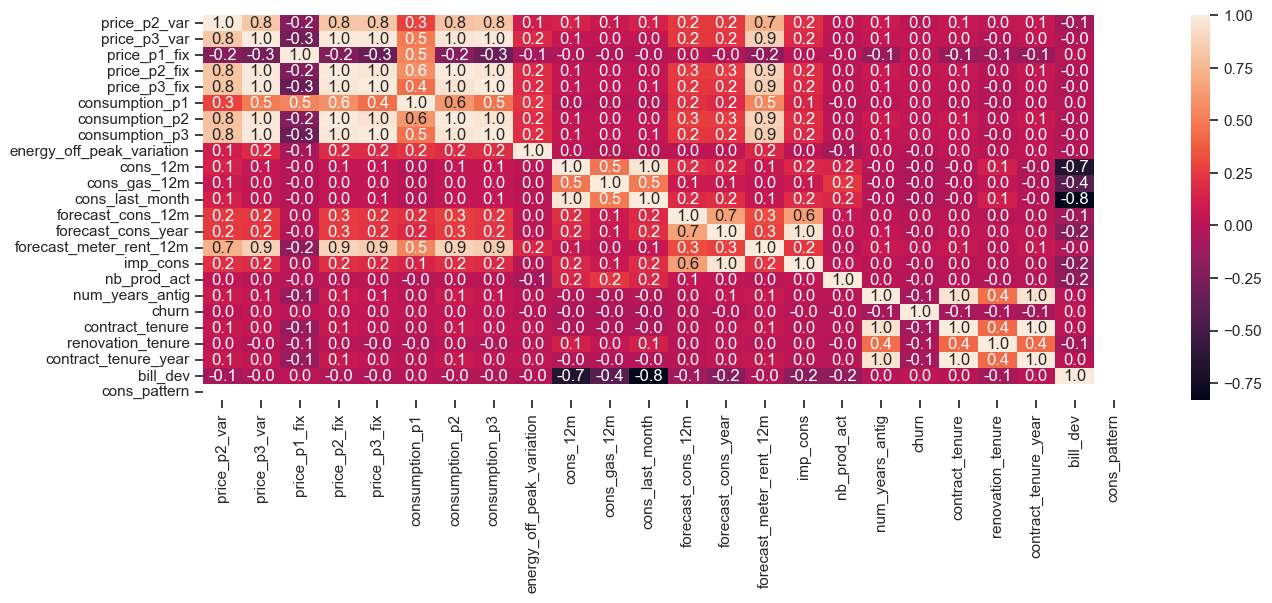

In [76]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15,5))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".1f");

In [77]:
df.dtypes

id                                   object
price_p2_var                        float64
price_p3_var                        float64
price_p1_fix                        float64
price_p2_fix                        float64
price_p3_fix                        float64
consumption_p1                      float64
consumption_p2                      float64
consumption_p3                      float64
energy_off_peak_variation           float64
activity_new                         object
channel_sales                        object
cons_12m                              int64
cons_gas_12m                          int64
cons_last_month                       int64
date_activ                   datetime64[ns]
date_end                     datetime64[ns]
date_modif_prod              datetime64[ns]
date_renewal                 datetime64[ns]
forecast_cons_12m                   float64
forecast_cons_year                    int64
forecast_discount_energy             object
forecast_meter_rent_12m         

In [78]:
df.shape

(14662, 41)

In [79]:
df = df.drop_duplicates(subset='id', keep='first')

In [80]:
df.shape

(14662, 41)

In [81]:
df.isna().sum()

id                               0
price_p2_var                     0
price_p3_var                     0
price_p1_fix                     0
price_p2_fix                     0
price_p3_fix                     0
consumption_p1                   0
consumption_p2                   0
consumption_p3                   0
energy_off_peak_variation        0
activity_new                     0
channel_sales                    0
cons_12m                         0
cons_gas_12m                     0
cons_last_month                  0
date_activ                       0
date_end                         0
date_modif_prod                  0
date_renewal                     0
forecast_cons_12m                0
forecast_cons_year               0
forecast_discount_energy         0
forecast_meter_rent_12m          0
forecast_price_energy_p1         0
forecast_price_energy_p2         0
forecast_price_pow_p1            0
has_gas                          0
imp_cons                         0
margin_gross_pow_ele

Modelling and Evaluation

In [ ]:
! pip install --pre -U pycaret

In [83]:
import pycaret
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
df= pd.read_csv('breast_cancer.csv')
df.head()

In [ ]:
df.info()

In [ ]:
s = setup (df, target = 'churn_y', ignore_features = ['id'], session_id = 42)

In [ ]:
best_model = compare_models(sort='AUC')

In [ ]:
tuned_best_model = tune_model(best_model, n_iter = 20)

In [ ]:
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [ ]:
plot_model(tuned_best_model, plot = 'auc')

In [ ]:
plot_model(tuned_best_model, plot = 'feature')

In [ ]:
evaluate_model(tuned_best_model)